In [2]:
#Import libraries

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
#Loading the dataset and basic data exploration
import os

df = pd.read_csv(r"csv files\auto-mpg.csv")
print(df.info())
print(df.isnull().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
""" 
From the above analysis, following points have been noted-
    1. 'horsepower' column is stated as 'object', which is wrong.
    2. There are no null values in any column

"""

" \nFrom the above analysis, following points have been noted-\n    1. 'horsepower' column is stated as 'object', which is wrong.\n    2. There are no null values in any column\n\n"

In [5]:
#Data Exploration and Cleaning

#change the horsepower column to float

#df['horsepower'].astype('float') is giving a value error
print(df['horsepower'].unique()) #gave a '?' in the values; also all values are 'int'

df['horsepower'] = df['horsepower'].replace('?',np.nan)
df.dropna(subset= ['horsepower'], inplace= True)
df['horsepower']= df['horsepower'].astype('float')

print(df['horsepower'].unique())

df.shape

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']
[130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193. 100. 105. 175. 153. 180. 110.
  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92. 145.
 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.  52.
  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152. 102.
 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138. 135.
 142.  77.  62. 132.  84.  64.  74. 116.  82.]


(392, 9)

In [6]:
#df.describe()
#print(f"Unique values of Model Year: {df['model year'].unique()}")
#print(f"Unique values for Origin: {df['origin'].unique()}")

# Applying one hot encoding on Origin
#from sklearn.preprocessing import OneHotEncoder
#ohe=OneHotEncoder()
#encoded = ohe.fit_transform(df[['origin']]).toarray()
#df_ohe = pd.DataFrame(encoded, columns= ohe.get_feature_names_out(), index=df.index)
#df_encoded = pd.concat([df,df_ohe],axis=1)



In [7]:
print(df.shape)
df.drop('origin',axis=1,inplace=True)
correlation = df['model year'].corr(df['mpg'])
print("Pearson correlation:",correlation)

(392, 9)
Pearson correlation: 0.5805409660907856


In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino


In [9]:
df[df.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name


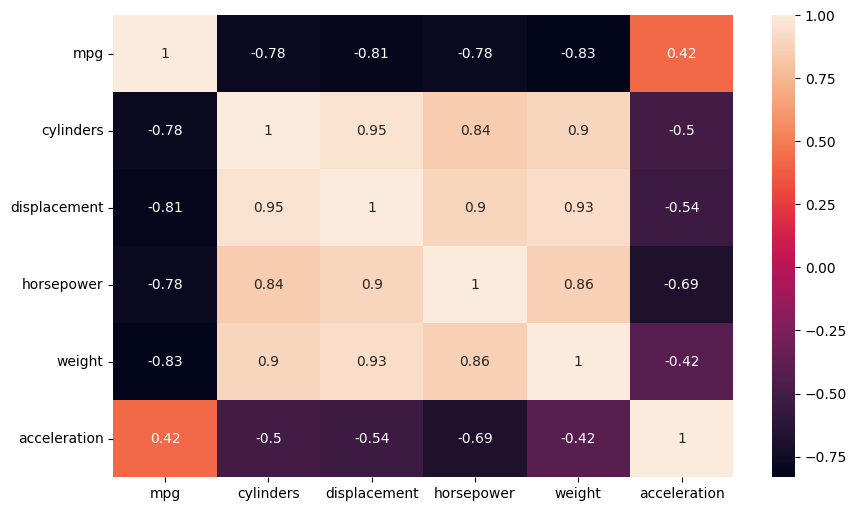

In [10]:
#EDA

plt.figure(figsize=(10,6))
sns.heatmap(df.iloc[:,:-2].corr(),annot=True)
plt.show()

#Multicollinearity exists, and strong inverse correlation with a many independent variables

In [11]:
for i in range(0,len(df.columns[:])):
    col_name = df.columns[i]
    print(f"Column: {col_name}, Unique values: {df[col_name].unique()}")

#From this analysis, it's clear that both cylinders and Model year have to be treated as categorical data
# Also, Model name appears to be redundant, as many unique values are there

Column: mpg, Unique values: [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 33.8 32.7 23.7 32.4 26.6 25.8 23.5 39.1 39.  35.1
 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4 34.  38.
 44. ]
Column: cylinders, Unique values: [8 4 6 3 5]
Column: displacement, Unique values: [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
 232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.   91.
  97.5  70.  120.   96.   98.

In [12]:
df.drop('car name',axis=1,inplace=True)
df[['cylinders','model year']] = df[['cylinders','model year']].astype('str')
df.head()

numeric_columns = [columns for columns in df.columns if df[columns].dtype!='object']
#numeric_columns = numeric_columns[:]
categorical_columns = [columns for columns in df.columns if df[columns].dtype=='object']
print(numeric_columns,categorical_columns)

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'] ['cylinders', 'model year']


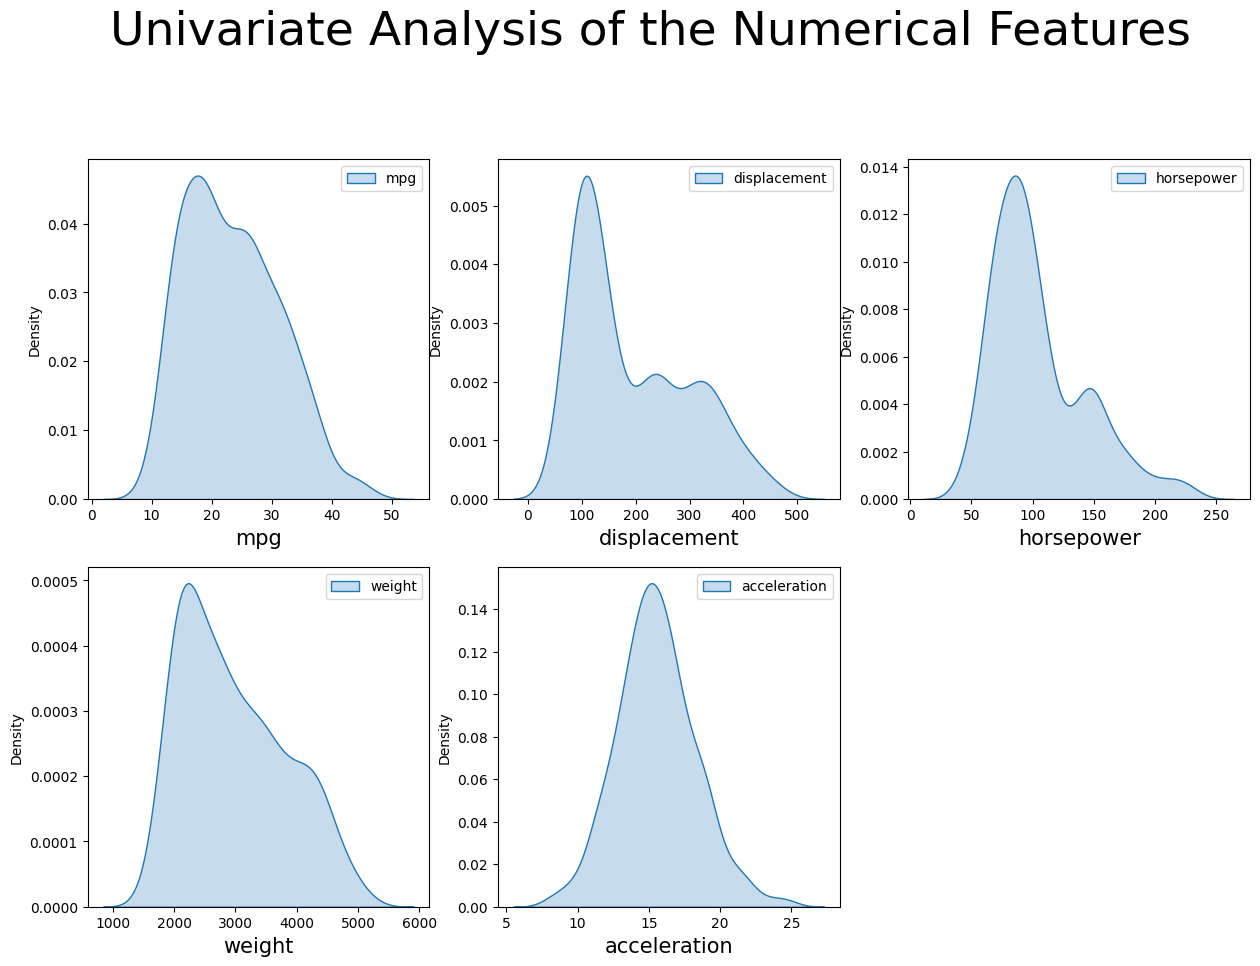

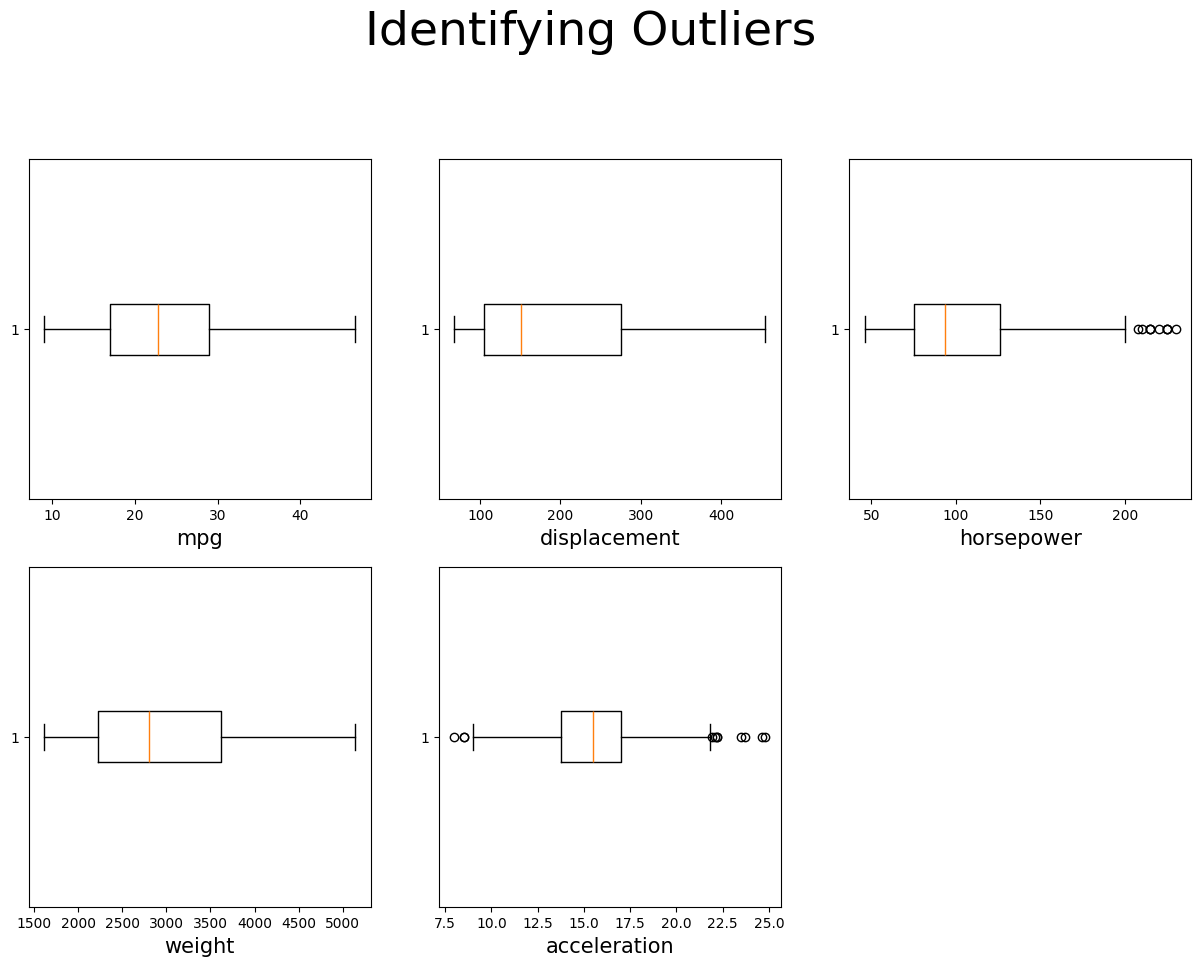

'\nmpg: The distribution appears somewhat skewed (many observations in the mid- to \n high-20s,with fewer in the high-30s).This suggests that while most cars in the \n dataset have moderate MPG, there are some with significantly higher MPG values.\n\nDisplacement & Horsepower: Both show multimodal or skewed distributions. This can \n indicate distinct subgroups in the data (e.g., smaller engines vs. larger engines).\nWeight: Appears unimodal but slightly skewed. Heavier cars dominate the dataset, \n with fewer extremely heavy or extremely light vehicles.\nAcceleration: Also somewhat skewed, with most cars having moderate acceleration \n and fewer cars at the extremes.\n\n '

In [13]:
#EDA on numerical features (Univariate Analysis)

plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of the Numerical Features", size=34)
i=0
for columns in numeric_columns:
    i=i+1
    plt.subplot(3,3,i)
    sns.kdeplot(df[[columns]],fill=True, color='blue')
    plt.xlabel(columns, fontsize=15)
plt.show()


plt.figure(figsize=(15,15))
plt.suptitle("Identifying Outliers", size=34)
j=0
for columns in numeric_columns:
    j+=1
    plt.subplot(3,3,j)
    plt.boxplot(df[columns], orientation='horizontal', )
    plt.xlabel(columns, fontsize=15)
plt.show()


#outliers in acceleration, horsepower and weights
"""
mpg: The distribution appears somewhat skewed (many observations in the mid- to 
 high-20s,with fewer in the high-30s).This suggests that while most cars in the 
 dataset have moderate MPG, there are some with significantly higher MPG values.

Displacement & Horsepower: Both show multimodal or skewed distributions. This can 
 indicate distinct subgroups in the data (e.g., smaller engines vs. larger engines).
Weight: Appears unimodal but slightly skewed. Heavier cars dominate the dataset, 
 with fewer extremely heavy or extremely light vehicles.
Acceleration: Also somewhat skewed, with most cars having moderate acceleration 
 and fewer cars at the extremes.

 """

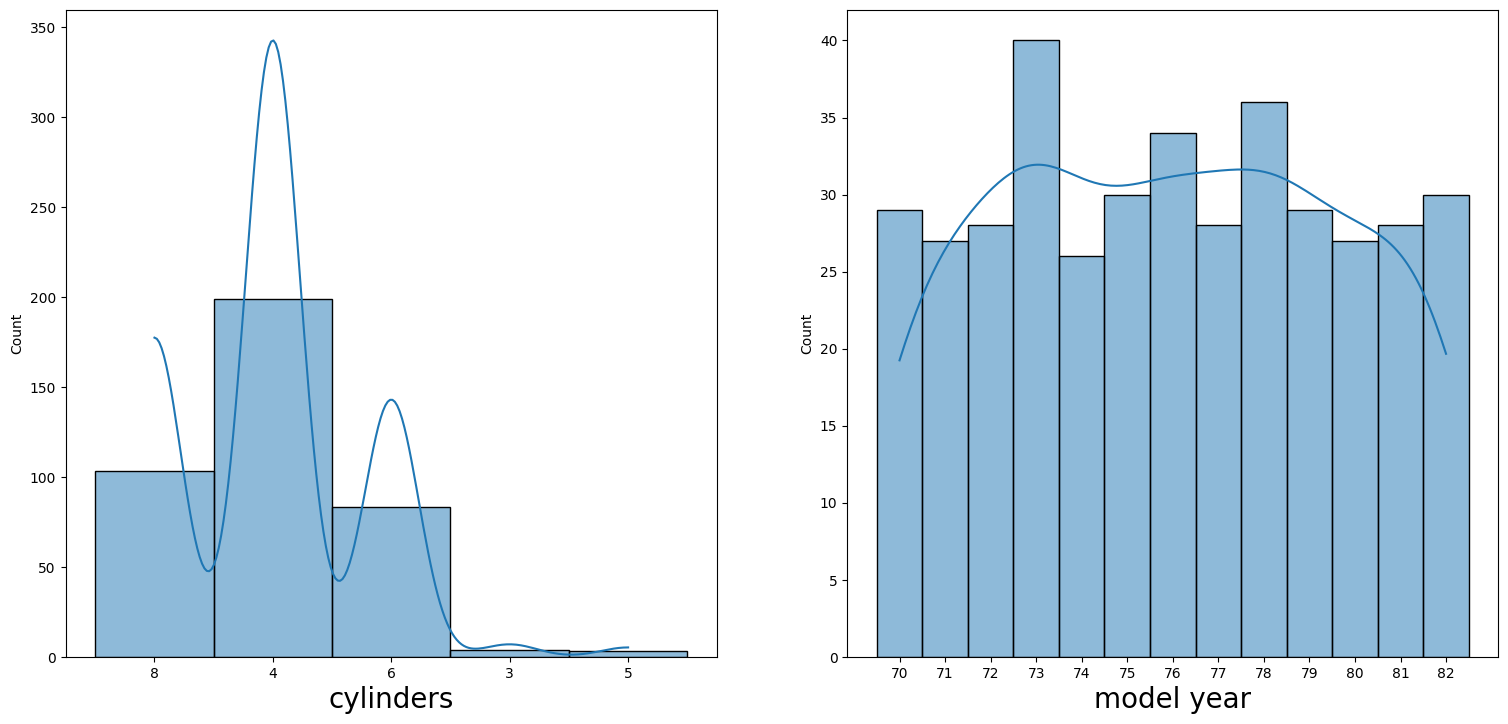

" \nCylinders:\nThe distribution is discrete, with 4, 6, and 8 cylinders being the most common \nconfigurations. This indicates a heavily multimodal distribution centered around \ncommon engine types.\n\nModel year:\nThe distribution looks relatively even, though there are small fluctuations \nin how many cars come from each year.\nBecause it's spread out from 1970 to 1982, you can analyze how car features \nor MPG might have changed over these model years.\n"

In [14]:
# EDA on categorical variables (Univariate Analysis)

plt.figure(figsize=(200,200))
i=1
for columns in categorical_columns:
    plt.subplot(20,20,i)
    sns.histplot(df[columns],kde=True)
    plt.xlabel(columns,fontsize=20)
    i+=1
plt.show()

""" 
Cylinders:
The distribution is discrete, with 4, 6, and 8 cylinders being the most common 
configurations. This indicates a heavily multimodal distribution centered around 
common engine types.

Model year:
The distribution looks relatively even, though there are small fluctuations 
in how many cars come from each year.
Because it's spread out from 1970 to 1982, you can analyze how car features 
or MPG might have changed over these model years.
"""

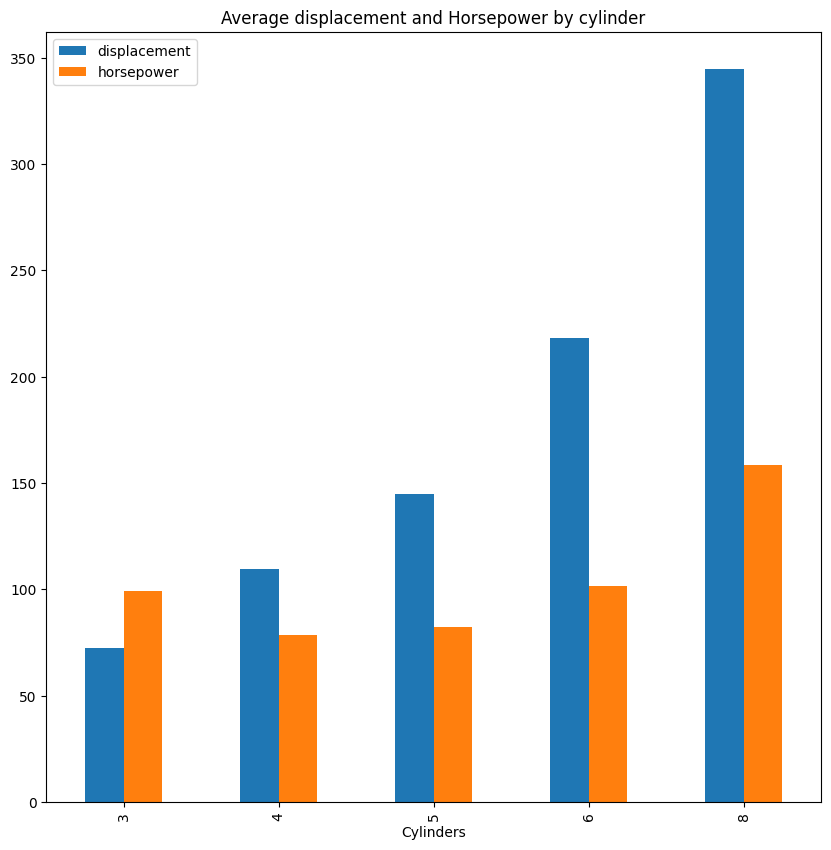

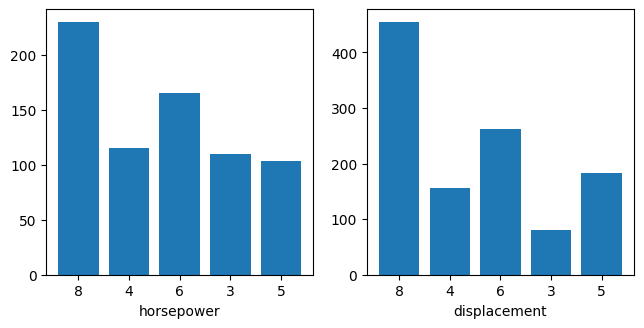

In [15]:
#EDA using Multivariate/Bivariate Analysis

#Checking the relation between Cylinders, Displacement and Horsepower
#doing this to check the multicollinearity between cylinders, displacement and hp.

grouped_df = df.groupby('cylinders')[['displacement','horsepower']].mean()
grouped_df.plot(kind='bar',figsize=(10,10))
plt.title("Average displacement and Horsepower by cylinder")
plt.xlabel("Cylinders")
plt.show()

""" 
An unexpected pattern for 3-cylinder category can be seen here, possibly because:
    Correlation across the entire dataset (including 4, 5, 6, 8 cylinders, etc.) 
    can still be strong even if a small subgroup (like 3-cylinder cars) shows an 
    anomaly. Correlation measures the overall relationship, whereas your bar chart 
    highlights group averages, which can be heavily influenced by outliers or small 
    sample sizes.Similarly, if there are only a few 5-cylinder cars, their average 
    horsepower might align closely with 4-cylinder models—again reflecting a limited 
    sample.

"""
#order = ['3','4','5','6','8']
#df_encoded['cylinders']=pd.Categorical(df_encoded['cylinders'], categories=order,ordered=True)
#df_encoded=df_encoded.sort_values('cylinders').reset_index(drop=True)

plt.figure(figsize=(20,20))
plt.subplot(5,5,1)
plt.bar(df['cylinders'],df['horsepower'])
plt.xlabel('horsepower',fontsize=10)
plt.subplot(5,5,2)
plt.bar(df['cylinders'],df['displacement'])
plt.xlabel('displacement',fontsize=10)
plt.show()



<Figure size 20000x20000 with 0 Axes>

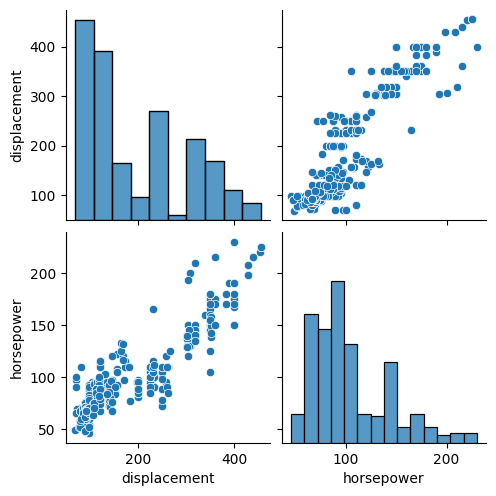

In [16]:
#plotting Pairplots now

plt.figure(figsize=(200,200))
sns.pairplot(df.iloc[:,1:-3])
plt.show()

In [17]:
df.to_csv("auto_mpg_cleaned.csv",index=False)

In [19]:

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
